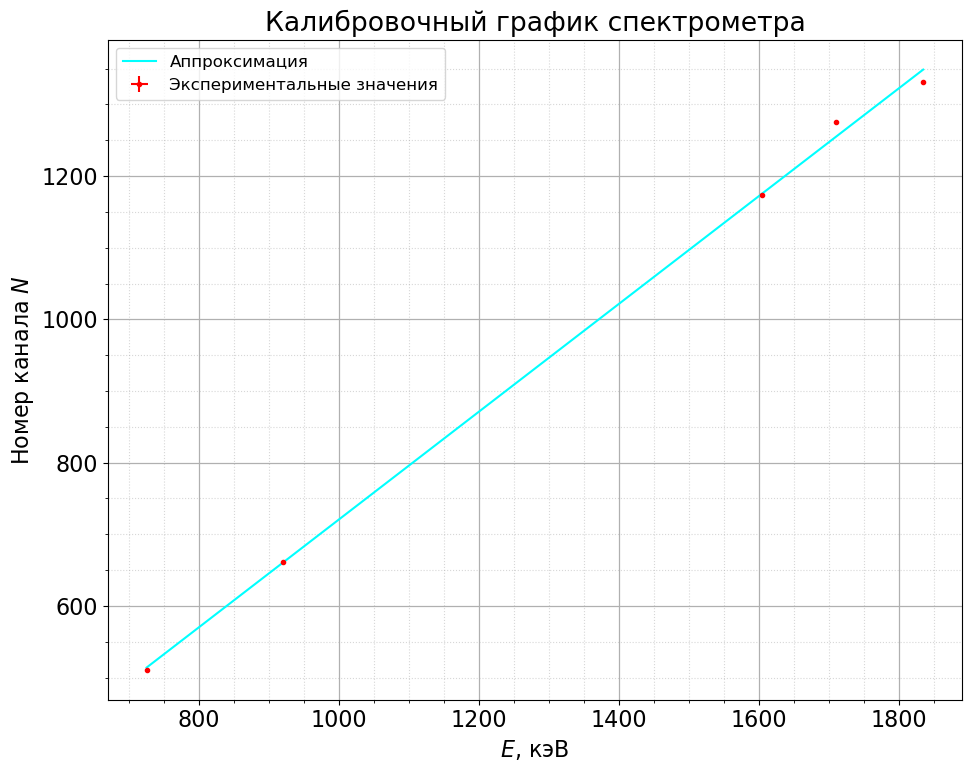

Результаты калибровки:
k = $0.75 \pm 0.02$
b = $-30 \pm 20$


\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        Источник & Энергия, кэВ & Канал\\ \hline
        Na & 511 & 725\\ \hline
        Na & 1275 & 1710\\ \hline
        Cs & 662 & 920\\ \hline
        Co & 1173 & 1604\\ \hline
        Co & 1332 & 1835\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lab_helper import *

# Данные: Na, Cs, Co
energies = np.array([511, 1275, 662, 1173, 1332])   # кэВ
channels = np.array([725, 1710, 920, 1604, 1835])   # номера каналов
dE = np.zeros_like(energies)                        # погрешности энергий (для известных линий берём ≈ 0)
dN = np.zeros_like(channels)                      # условная погрешность канала (можно уточнить по Гауссу)

# Линейная аппроксимация и график
k, b = fit_linear_and_plot_data(
    file="calibration.png",
    title="Калибровочный график спектрометра",
    xlabel=r"$E$, кэВ",
    ylabel=r"Номер канала $N$",
    x=channels, y=energies,
    dx=dN, dy=dE
)

print("Результаты калибровки:")
print("k =", format_latex_value(k))
print("b =", format_latex_value(b))

# Таблица для отчёта
table = [
    ["Источник", "Энергия, кэВ", "Канал"],
    ["Na", "511", "725"],
    ["Na", "1275", "1710"],
    ["Cs", "662", "920"],
    ["Co", "1173", "1604"],
    ["Co", "1332", "1835"]
]

print_latex_table(table)


### Экспериментальные данные
Ниже приведены твои измеренные пики (из Excel).

### Энергетическое разрешение
Вычисляем $R = \Delta E / E$ для каждого пика.

### Зависимость $R^2$ от энергии
Проверяем теоретическую зависимость $R \propto 1/\sqrt{E}$. Построим $R^2(E)$. 

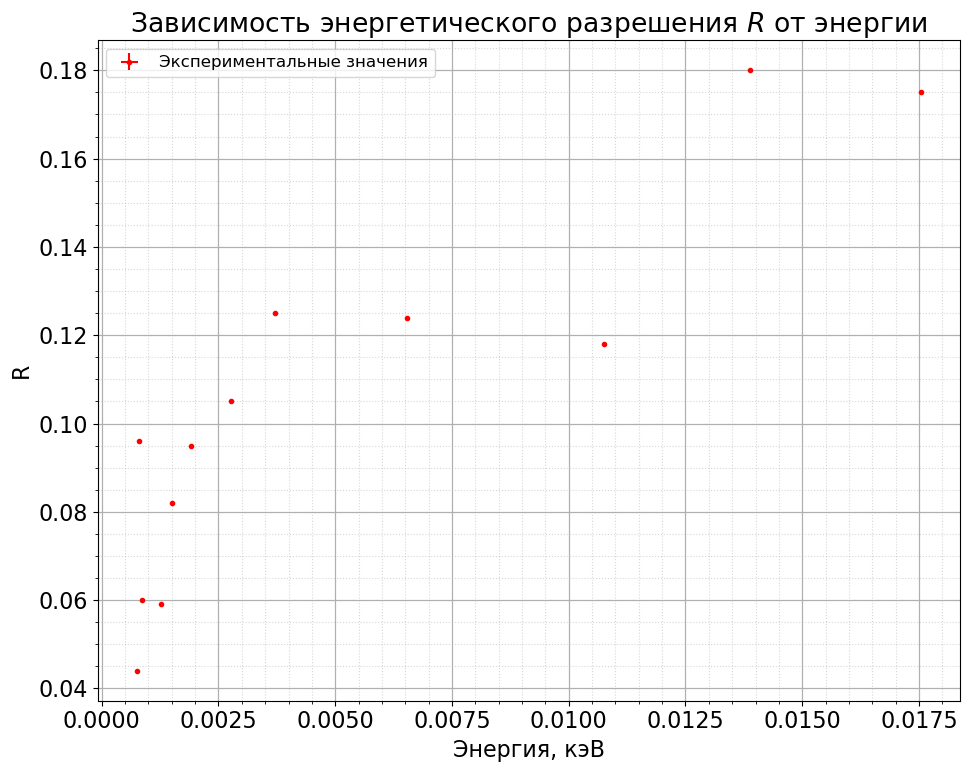

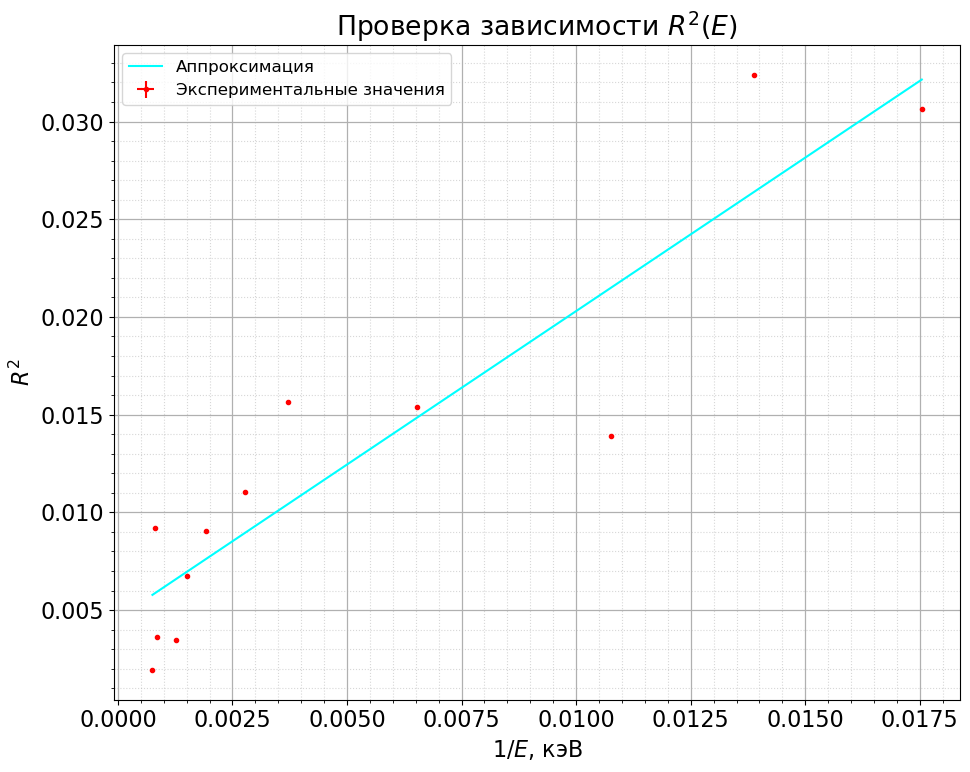

([np.float64(1.5703372348075535), np.float64(0.21561701704989825)],
 [np.float64(0.004596059182879065), np.float64(0.001634809954059675)])

In [37]:


energies = [1/x for x in [1164, 1328, 668, 1246, 522, 93, 57, 72, 153, 362, 270, 789]]
R = [0.060, 0.044, 0.082, 0.096, 0.095, 0.118, 0.175, 0.180, 0.124, 0.105, 0.125, 0.059]

dx = [0]*len(energies)   # для простоты — нет погрешностей по энергии
dy = [0]*len(R)          # погрешности по R тоже можно оценить, но пока 0

plot_data(
    "resolution.png",
    title="Зависимость энергетического разрешения $R$ от энергии",
    xlabel="Энергия, кэВ",
    ylabel="R",
    x=energies, y=R,
    dx=dx, dy=dy
)

R2 = [r**2 for r in R]

fit_linear_and_plot_data(
    "resolution_sq.png",
    title="Проверка зависимости $R^2(E)$",
    xlabel="$1/E$, 1/кэВ",
    ylabel="$R^2$",
    x=energies, y=R2,
    dx=dx, dy=dy
)







### Выводы
- Построен калибровочный график «канал – энергия».
- Определены энергии пиков для Co, Cs, Na, Am, Eu.
- Найдено энергетическое разрешение для разных энергий.
- Проверена зависимость $R^2(E)$.
- Выявлены комптоновские края и аннигиляционные пики.